In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/ecboyes/Thinkful-Data-Science/"
             "master/yelp_labelled.txt"
            )

#data_path = ("https://raw.githubusercontent.com/ecboyes/Thinkful-Data-Science/"
#             "master/amazon_cells_labelled.txt"
#            )
review_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
review_raw.columns = ['review', '1']
print(review_raw.dtypes)

review    object
1          int64
dtype: object


In [3]:
keywords = ['love', 'loved', 'amazing', 'delightful', 'delicious', 'good', 'great', 'perfect', 'fantastic', 
            'excellent', 'tasty', 'beautiful', 'best', 'yum', 
            'worst', 'terrible', 'never', 'slow', 'rude', 'overpriced', 'bad', 'waited', 'disappointed', 'back', 
            'go back', 'minutes', 'waste']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    review_raw[str(key)] = review_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
#sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [5]:
review_raw['bool'] = (review_raw['1'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.
#print(review_raw['bool'])

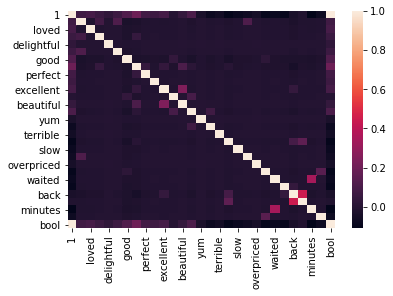

In [6]:
sns.heatmap(review_raw.corr())

In [7]:
data = review_raw[keywords]
target = review_raw['1']

In [8]:
## Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 376


This classifier really can only get so accurate, I found that I could not seem to correctly label any more than 624 points correctly.

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[483,  17],
       [359, 141]])

There were 483 times a review was positive and we predicted positive, 17 times when a review was positive and we predicted negative, 359 times when a review was negative and we predicted positive, and 141 times when a review was negative and we predicted negative. So our module is pretty good at predicting when a reivew is positive, but quite bad at predicting when a review is negative. Below we show just how good our module is.

In [10]:
sensitivity = (392/(392+108))*100
print("Sensitivity = {}%".format(sensitivity))
specificity = (487/(487+13))*100
print("Specificity = {}%".format(specificity))

Sensitivity = 78.4%
Specificity = 97.39999999999999%


In [11]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.65
Testing on Sample: 0.624


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.66, 0.63, 0.61, 0.62, 0.6 , 0.65, 0.62, 0.55, 0.66])

This module seems okay at first, but when we try using holdout groups, we see that its accuracy reduces dramatically.